In [424]:
%pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [425]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

In [426]:
# TODO:
# (complete) 1. Load the cancer dataset 
# (complete) 2. Perform PCA
# (complete) 3. Train a linear SVM using the first two principal components
# (complete) 4. Plot the decision boundary
#which ever you complete put complete infront of it

In [427]:
def load_data():
    # Load data and standardize
    breastCancer = load_breast_cancer()
    breastCancerData = breastCancer.data
    breastCancerTarget = breastCancer.target

    scaled_data = StandardScaler().fit_transform(breastCancerData)
    return scaled_data, breastCancerTarget
    

In [428]:
def perform_pca(data):
    # Perform PCA using SVD and other necessary computations
    # Perform Singular Value Decomposition (SVD)
    U, s, VT = np.linalg.svd(data.T)
    
    k = 2  # number of components to keep
    Uk = U[:, :k]

    return np.dot(data, Uk)

In [429]:
def train_svm(x_pca, breastCancerTarget):
    # Train SVM classifier on the PCA-transformed data
    classifier = svm.SVC(kernel='linear')
    return  classifier.fit(x_pca, breastCancerTarget)

In [430]:
def plot_decision_boundary(x_pca, breastCancerTarget, classifier):
    # Plot the decision boundary and data points
    minX = x_pca[:, 0].min()-1
    maxX = x_pca[:, 0].max()+1
    
    minY = x_pca[:, 1].min()-1
    maxY = x_pca[:, 1].max()+1
    
    scatter = plt.scatter(x_pca[:, 0], x_pca[:, 1], c=breastCancerTarget, cmap='plasma')
    
    xCoordinates, yCoordinates = np.meshgrid(np.linspace(minX, maxX, 100), np.linspace(minY, maxY, 100))
    
    pcl = classifier.predict(np.c_[xCoordinates.ravel(), yCoordinates.ravel()])
    
    plt.contour(xCoordinates, yCoordinates, pcl.reshape(xCoordinates.shape), colors='black')
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.colorbar(scatter)
    plt.title('Decision Boundary of Breast Cancer Dataset')
    plt.show()

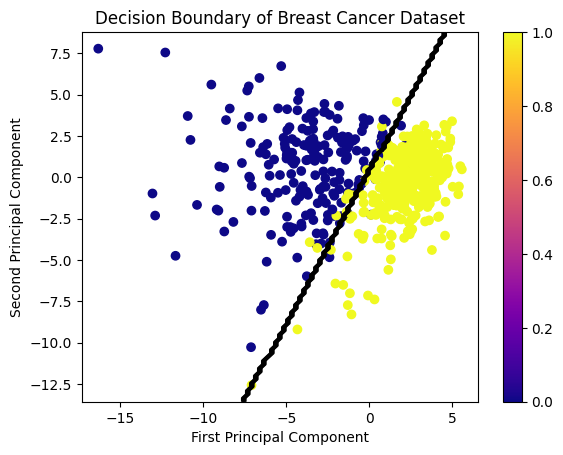

In [431]:
if __name__ == "__main__":
    # call functions here
    breastCancerScaledData, breastCancerTarget = load_data()
    x_pca = perform_pca(breastCancerScaledData) 
    classifier = train_svm(x_pca, breastCancerTarget)
    plot_decision_boundary(x_pca,breastCancerTarget,classifier)